In [1]:
import numpy as np
import copy
import matplotlib.pyplot as plt
import h5py
import scipy
import pandas as pd
from PIL import Image
from scipy import ndimage
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import average_precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score
from sklearn import metrics


import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.metrics import RocCurveDisplay
from sklearn.svm import SVC

import tensorflow as tf


%matplotlib inline
%load_ext autoreload
%autoreload 2

#sample_file = '/home/nhen/matrix_chr6_22.txt'
#matrix_file = pd.read_csv('/home/nhen/matrix_chr6_22.txt')
#matrix_file.to_csv ('/home/nhen/matrix_chr6_22.csv', index=None)

In [2]:
#matrix = pd.read_csv('/labs/mpsnyder/cs230_als/gwas_005_matrix_chr1_22_LDclumped_r2.5.csv', sep=',', header=None, low_memory=False)
#matrix = pd.read_csv('/labs/mpsnyder/cs230_als/gwas_005_matrix_chr1_22_LDclumped_r2.1.csv', sep=',', header=None, low_memory=False)
matrix = pd.read_csv('/labs/mpsnyder/cs230_als/gwas_005_matrix_chr1_22_LDclumped_r2.001.csv', sep=',', header=None, low_memory=False)


In [3]:
print(matrix.head(20))
print(matrix.shape)
print(type(matrix))
#print(labels)

    0                   1                  2                  3     \
0    NaN              Allele                 V1                 V2   
1    1.0              UserID  LP6005681-DNA_A10  LP6005681-DNA_G10   
2    2.0                 Sex                  1                  1   
3    3.0           Phenotype                  1                  1   
4    4.0     Northeast.Asian           0.021061           0.022297   
5    5.0       Mediterranean           0.395768           0.371843   
6    6.0    Southern.African           0.002118           0.001338   
7    7.0     Southwest.Asian           0.216771           0.223045   
8    8.0     Native.American           0.036049           0.016554   
9    9.0            Oceanian           0.003113            0.01316   
10  10.0      Southeast.Asia            0.00872           0.014813   
11  11.0   Northern.European           0.315368           0.335253   
12  12.0  Subsaharan.African           0.001033           0.001697   
13  13.0            

In [4]:
matrix_re = matrix.transpose()

In [5]:
new_df = matrix_re.dropna()

In [6]:
print(new_df.shape)

(8954, 973)


In [7]:
matrix_re = matrix.transpose()
matrix_noNA = matrix_re.dropna()
data_labeled = matrix_noNA.transpose()
print(data_labeled.shape)
#data_labeled = new_df.transpose()
#X = data.iloc[17:] #builds df of chrs on (post population info)
data = data_labeled.drop(data_labeled.columns[[0]], axis=1)

(973, 8954)


In [8]:
y = data.iloc[3] #builds object of only phenotype
y = pd.DataFrame(y) #turns into dataframe
y = y.astype(int) 
#y = y.subtract(1) PHENOTYPE WAS ALREADY CONVERTED TO 1'S AND 0'S WHEN LD CLUMPING

In [9]:
X = data.iloc[17:] #builds df of chrs on (post population info)
X = X.transpose()

In [10]:
print(X.shape)

(8953, 956)


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 0)
print(y_train.shape)
print(y_test.shape)

(6267, 1)
(2686, 1)


In [12]:
Classifier = LogisticRegression(random_state=0, max_iter = 10000)
Classifier.fit(X_train, y_train.values.ravel())

LogisticRegression(max_iter=10000, random_state=0)

In [13]:
#accuracy
y_pred = Classifier.predict(X_test)
y_pred_train = Classifier.predict(X_train)
print("Accuracy score train: ", accuracy_score(y_train, y_pred_train))
print("Accuracy score test: ", accuracy_score(y_test, y_pred))


Accuracy score train:  0.7724589117600128
Accuracy score test:  0.6824274013402829


In [14]:
#precision
print("Precision train: ", average_precision_score(y_train, y_pred_train))
print("Precision test: ", average_precision_score(y_test, y_pred))

Precision train:  0.7888181473095605
Precision test:  0.7381029943938374


In [15]:
#recall
print("Recall train: ", recall_score(y_train, y_pred_train, average="macro"))
print("Recall test: ", recall_score(y_test, y_pred, average="macro"))

Recall train:  0.6323528264600343
Recall test:  0.5333581011638565


In [16]:
#f1
print("F1 train: ", f1_score(y_train, y_pred_train, average="macro"))
print("F1 test: ", f1_score(y_test, y_pred, average="macro"))

F1 train:  0.6475343175890699
F1 test:  0.5284102428571222


In [17]:
# auc
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
fpr_train, tpr_train, thresholds_train = metrics.roc_curve(y_train, y_pred_train)
print("AUC train: ", metrics.auc(fpr_train, tpr_train))
print("AUC test: ", metrics.auc(fpr, tpr))

AUC train:  0.6323528264600343
AUC test:  0.5333581011638566


In [18]:
#ROC of auc
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_test, y_test.values.ravel())
clf = LogisticRegression(solver="liblinear", random_state=0).fit(X_train, y_train.values.ravel())
#print(roc_auc_score(y, clf.decision_function(X)))
#print(roc_auc_score(y, clf.predict_proba(X)[:, 1]))

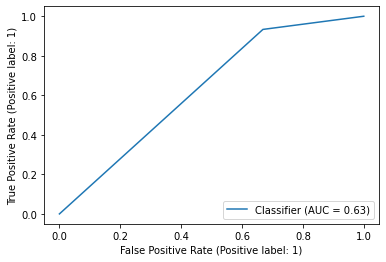

In [19]:
#ROC plot train
RocCurveDisplay.from_predictions(y_train, y_pred_train)
plt.show()

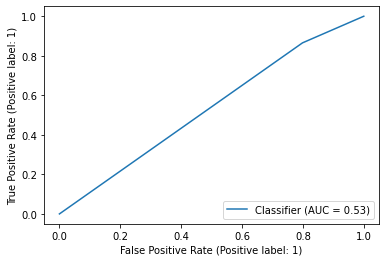

In [20]:
#ROC plot train
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()